<a href="https://colab.research.google.com/github/ketrabusek/Uczenie_maszynowe/blob/use_case1/Zadanie1_Uscinski_Bartosz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wczytanie danych

In [1]:
import pandas as pd
data = pd.read_csv('sample_data/case1.csv', sep=';')
print(data.head())

   Unnamed: 0  Index                                     Address  FLAG  \
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73      

Sprawdzenie braków danych

In [2]:
print("Liczba wierszy w danych:", len(data))

def sprawdz_braki_danych(data):
    braki = data.isnull().sum()
    if braki.sum() == 0:
        print("Brak brakujących danych w zestawie.")
    else:
        print("Liczba brakujących danych w poszczególnych kolumnach:")
        print(braki)

sprawdz_braki_danych(data)


Liczba wierszy w danych: 9841
Liczba brakujących danych w poszczególnych kolumnach:
Unnamed: 0                                                 0
Index                                                      0
Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
m

In [3]:
for column in ['ERC20 most sent token type', 'ERC20_most_rec_token_type']:
    data[column] = data[column].replace(['', ' '], '0')
    data[column].fillna('0', inplace=True)

for column in ['ERC20 most sent token type', 'ERC20_most_rec_token_type']:
    if data[column].dtype == 'category':
        most_common_value = data[column].mode()[0]
        data[column].fillna(most_common_value, inplace=True)

from sklearn.preprocessing import LabelEncoder

# Inicjalizacja obiektu LabelEncoder dla obu kolumn
label_encoder_sent = LabelEncoder()
label_encoder_rec = LabelEncoder()

# Dopasowanie i transformacja danych w kolumnach tokenów
data['ERC20 most sent token type'] = label_encoder_sent.fit_transform(data['ERC20 most sent token type'])
data['ERC20_most_rec_token_type'] = label_encoder_rec.fit_transform(data['ERC20_most_rec_token_type'])

sprawdz_braki_danych(data)

Liczba brakujących danych w poszczególnych kolumnach:
Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                  

In [4]:
# Usunięcie wierszy zawierających brakujące dane
data.dropna(inplace=True)

sprawdz_braki_danych(data)

Brak brakujących danych w zestawie.


In [5]:
data

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,62,298
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,153,256
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,3,434
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,215,434
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,236,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,9832,2171,0xfea28ca175a80f5a348016583961f63be8605f80,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,3,73
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,3,193
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,3,73
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,3,184


Standaryzacja

In [6]:
from sklearn.preprocessing import StandardScaler

data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("Address", axis=1, inplace=True)
data.drop("Index", axis=1, inplace=True)

scaler = StandardScaler()

# Wybór kolumn do standaryzacji (bez kolumny FLAG)
columns_to_scale = data.columns[1:]

# Standaryzacja wybranych kolumn
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print(data.head())

   FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     0                 -0.205439                     -0.305060   
1     0                  0.330540                     -0.226326   
2     0                 10.877977                     -0.248468   
3     0                  0.218081                      0.315252   
4     0                 -0.241924                      0.100873   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                 1.416878  0.752165     -0.090503   
1                                 2.965941 -0.041091     -0.173044   
2                                 0.849497 -0.157486     -0.171006   
3                                 0.489941 -0.128388     -0.172025   
4                                 0.444433  5.657198     -0.160816   

   Number of Created Contracts  Unique Received From Addresses  \
0                    -0.027442                        0.023475   
1                    -0.027442              

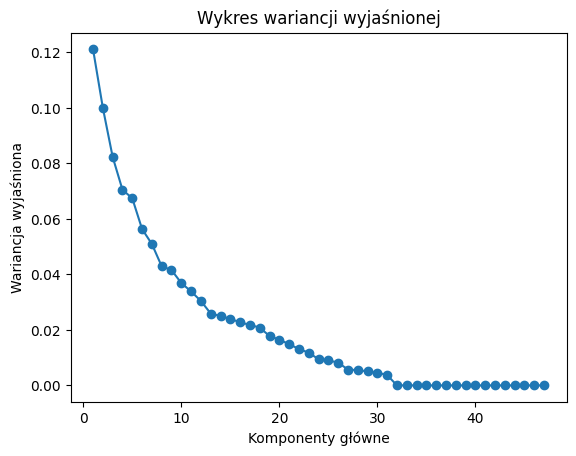

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
pca = PCA()


pca.fit(data[columns_to_scale])

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Wykres wariancji wyjaśnionej')
plt.xlabel('Komponenty główne')
plt.ylabel('Wariancja wyjaśniona')
plt.show()


In [8]:
explained_variance_ratios = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratios, start=1):
    print(f'Komponent główny {i}: Wariancja wyjaśniona: {ratio:.4f}')


Komponent główny 1: Wariancja wyjaśniona: 0.1211
Komponent główny 2: Wariancja wyjaśniona: 0.1000
Komponent główny 3: Wariancja wyjaśniona: 0.0823
Komponent główny 4: Wariancja wyjaśniona: 0.0705
Komponent główny 5: Wariancja wyjaśniona: 0.0674
Komponent główny 6: Wariancja wyjaśniona: 0.0563
Komponent główny 7: Wariancja wyjaśniona: 0.0509
Komponent główny 8: Wariancja wyjaśniona: 0.0429
Komponent główny 9: Wariancja wyjaśniona: 0.0416
Komponent główny 10: Wariancja wyjaśniona: 0.0369
Komponent główny 11: Wariancja wyjaśniona: 0.0339
Komponent główny 12: Wariancja wyjaśniona: 0.0304
Komponent główny 13: Wariancja wyjaśniona: 0.0259
Komponent główny 14: Wariancja wyjaśniona: 0.0250
Komponent główny 15: Wariancja wyjaśniona: 0.0240
Komponent główny 16: Wariancja wyjaśniona: 0.0227
Komponent główny 17: Wariancja wyjaśniona: 0.0218
Komponent główny 18: Wariancja wyjaśniona: 0.0208
Komponent główny 19: Wariancja wyjaśniona: 0.0178
Komponent główny 20: Wariancja wyjaśniona: 0.0165
Komponent

In [9]:
import numpy as np

cumulative_variance_ratio = np.cumsum(explained_variance_ratios)

# Wybór liczby komponentów, które wyjaśniają co najmniej 80% wariancji
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.80) + 1
explained_variance_80 = cumulative_variance_ratio[n_components_80 - 1]

# Wybór liczby komponentów, które wyjaśniają co najmniej 90% wariancji
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
explained_variance_90 = cumulative_variance_ratio[n_components_90 - 1]

print(f'Liczba komponentów wyjaśniających co najmniej 80% wariancji: {n_components_80}')
print(f'Kumulatywna wariancja wyjaśniona przez {n_components_80} komponentów: {explained_variance_80:.4f}')
print(f'Liczba komponentów wyjaśniających co najmniej 90% wariancji: {n_components_90}')
print(f'Kumulatywna wariancja wyjaśniona przez {n_components_90} komponentów: {explained_variance_90:.4f}')


Liczba komponentów wyjaśniających co najmniej 80% wariancji: 15
Kumulatywna wariancja wyjaśniona przez 15 komponentów: 0.8092
Liczba komponentów wyjaśniających co najmniej 90% wariancji: 20
Kumulatywna wariancja wyjaśniona przez 20 komponentów: 0.9088


In [10]:
from sklearn.preprocessing import StandardScaler

data_numeric = data.select_dtypes(include=['number'])

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_numeric)

pca_80 = PCA(n_components=14)
pca_80.fit(data_scaled)
data_pca_80 = pca_80.transform(data_scaled)

pca_90 = PCA(n_components=19)
pca_90.fit(data_scaled)
data_pca_90 = pca_90.transform(data_scaled)

In [11]:
data

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,-0.205439,-0.305060,1.416878,0.752165,-0.090503,-0.027442,0.023475,0.326144,-0.140651,...,-0.011145,0.003217,-0.010223,0.0,0.0,0.0,5.585223,3.128332,0.438015,1.288913
1,0,0.330540,-0.226326,2.965941,-0.041091,-0.173044,-0.027442,-0.088739,-0.051268,-0.140651,...,-0.011143,-0.011049,-0.010683,0.0,0.0,0.0,-0.057156,0.130313,1.721362,0.994915
2,0,10.877977,-0.248468,0.849497,-0.157486,-0.171006,-0.027442,-0.072709,-0.094816,-0.140315,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,0.190274,-0.394045,2.240907
3,0,0.218081,0.315252,0.489941,-0.128388,-0.172025,-0.027442,-0.082327,-0.054897,-0.140651,...,-0.011050,-0.011041,-0.010677,0.0,0.0,0.0,-0.057156,0.370155,2.595730,2.240907
4,0,-0.241924,0.100873,0.444433,5.657198,-0.160816,-0.020676,-0.082327,-0.033123,-0.140651,...,-0.011145,-0.011011,-0.010660,0.0,0.0,0.0,0.685262,1.329521,2.891887,0.273919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,1,-0.243577,-0.351240,-0.709517,-0.160017,-0.181196,-0.027442,-0.104770,-0.102074,-0.140651,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,-0.169489,-0.394045,-0.286077
9836,1,0.327199,-0.324581,-0.532268,-0.154956,-0.167949,-0.027442,-0.069502,-0.087558,-0.140639,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,-0.169489,-0.394045,0.553918
9837,1,-0.243577,-0.351240,-0.709517,-0.160017,-0.181196,-0.027442,-0.104770,-0.102074,-0.140651,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,-0.229449,-0.394045,-0.286077
9838,1,-0.130668,-0.258802,0.079757,-0.075251,-0.137378,-0.027442,-0.005380,0.057601,-0.140648,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,0.010393,-0.394045,0.490918


In [12]:
# Komponenty główne
components_df = pd.DataFrame(pca_80.components_, columns=data_numeric.columns)
print("Komponenty główne:")
print(components_df.drop('FLAG', axis=1))  # Wykluczamy kolumnę FLAG

# Wpływ zmiennych na komponenty główne
top_variables_per_component = {}
for idx, component in enumerate(pca_80.components_):
    top_variables = [data_numeric.columns[i] for i in component.argsort()[-3:][::-1] if data_numeric.columns[i] != 'FLAG']  # Wykluczamy kolumnę FLAG
    top_variables_per_component[f'Komponent {idx+1}'] = top_variables

print("\nNajważniejsze zmienne dla każdego komponentu:")
for component, variables in top_variables_per_component.items():
    print(f"{component}: {', '.join(variables)}")


Komponenty główne:
    Avg min between sent tnx  Avg min between received tnx  \
0                   0.012911                     -0.008752   
1                  -0.001583                     -0.003867   
2                   0.001213                      0.000164   
3                   0.018123                      0.017150   
4                  -0.094765                     -0.082053   
5                  -0.074128                     -0.052615   
6                   0.045805                      0.024867   
7                  -0.101968                     -0.173664   
8                  -0.139341                     -0.146130   
9                   0.159668                      0.187071   
10                  0.192441                      0.291573   
11                  0.174589                      0.336277   
12                  0.330395                     -0.259432   
13                  0.191985                     -0.034659   

    Time Diff between first and last (Mins)  Sent 

In [13]:
data

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,-0.205439,-0.305060,1.416878,0.752165,-0.090503,-0.027442,0.023475,0.326144,-0.140651,...,-0.011145,0.003217,-0.010223,0.0,0.0,0.0,5.585223,3.128332,0.438015,1.288913
1,0,0.330540,-0.226326,2.965941,-0.041091,-0.173044,-0.027442,-0.088739,-0.051268,-0.140651,...,-0.011143,-0.011049,-0.010683,0.0,0.0,0.0,-0.057156,0.130313,1.721362,0.994915
2,0,10.877977,-0.248468,0.849497,-0.157486,-0.171006,-0.027442,-0.072709,-0.094816,-0.140315,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,0.190274,-0.394045,2.240907
3,0,0.218081,0.315252,0.489941,-0.128388,-0.172025,-0.027442,-0.082327,-0.054897,-0.140651,...,-0.011050,-0.011041,-0.010677,0.0,0.0,0.0,-0.057156,0.370155,2.595730,2.240907
4,0,-0.241924,0.100873,0.444433,5.657198,-0.160816,-0.020676,-0.082327,-0.033123,-0.140651,...,-0.011145,-0.011011,-0.010660,0.0,0.0,0.0,0.685262,1.329521,2.891887,0.273919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,1,-0.243577,-0.351240,-0.709517,-0.160017,-0.181196,-0.027442,-0.104770,-0.102074,-0.140651,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,-0.169489,-0.394045,-0.286077
9836,1,0.327199,-0.324581,-0.532268,-0.154956,-0.167949,-0.027442,-0.069502,-0.087558,-0.140639,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,-0.169489,-0.394045,0.553918
9837,1,-0.243577,-0.351240,-0.709517,-0.160017,-0.181196,-0.027442,-0.104770,-0.102074,-0.140651,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,-0.229449,-0.394045,-0.286077
9838,1,-0.130668,-0.258802,0.079757,-0.075251,-0.137378,-0.027442,-0.005380,0.057601,-0.140648,...,-0.011145,-0.011049,-0.010683,0.0,0.0,0.0,-0.205640,0.010393,-0.394045,0.490918


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Dopasowanie scaler do danych i przekształcenie ich
data_scaled = scaler.fit_transform(data_pca_80)
from sklearn.decomposition import PCA

pca_final = PCA(n_components=14)

pca_final.fit(data_scaled)
data_final = pca_final.transform(data_scaled)
data_final

array([[ 1.24641412, -0.52620237,  1.13755694, ..., -0.5664961 ,
         1.1178746 , -0.36597865],
       [-1.62558801,  0.17169875, -0.11379277, ..., -0.48265055,
        -0.37914257, -0.45304455],
       [-5.43306779,  1.42623956,  0.98003217, ...,  0.04007439,
        -0.86400823,  1.61931212],
       ...,
       [ 0.10366354, -0.51210934, -0.23481154, ...,  0.21662056,
         0.62203516,  1.50375261],
       [-0.42026441, -0.52086247, -0.21878244, ...,  0.03875613,
         0.50473549,  1.46678363],
       [-0.96368   , -0.5668905 ,  1.36963667, ...,  1.50918772,
        -0.43024885,  1.61169299]])

Podział danych na zbiór treningowy i testowy

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_pca_80, data['FLAG'], test_size=0.2, random_state=42)

# Sprawdzenie rozmiarów zbiorów treningowego i testowego
print("Rozmiar zbioru treningowego:", X_train.shape[0])
print("Rozmiar zbioru testowego:", X_test.shape[0])


Rozmiar zbioru treningowego: 7209
Rozmiar zbioru testowego: 1803


In [16]:
from imblearn.under_sampling import RandomUnderSampler

# Inicjalizacja obiektu RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Zastosowanie undersamplingu do danych treningowych
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

Modele

In [17]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score
logistic_regression = LogisticRegression()

logistic_regression.fit( X_train_resampled, y_train_resampled)

y_pred = logistic_regression.predict(X_test)
precision_test = precision_score(y_test, y_pred)
print("Precyzja predykcji na danych testowych:", precision_test)

Precyzja predykcji na danych testowych: 0.9877551020408163


In [18]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train_resampled, y_train_resampled)

y_pred = tree_model.predict(X_test)
precision_tree= precision_score(y_test, y_pred)
print("Precyzja modelu drzewa decyzyjnego na danych testowych:", precision_tree)

Precyzja modelu drzewa decyzyjnego na danych testowych: 0.9641434262948207


In [19]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

knn_model = KNeighborsClassifier()

knn_model.fit(X_train_resampled, y_train_resampled)

y_pred = knn_model.predict(X_test)
precision_knn= precision_score(y_test, y_pred)
print("Dokładność modelu KNN na danych testowych:", precision_knn)


Dokładność modelu KNN na danych testowych: 0.9958677685950413


Metoda K-najbliższych sąsiadów osiągnęła najwyższą dokładność na zbiorze testowym, wynoszącą około 99.59%. Jest to bardzo wysoki wynik, sugerujący, że model dobrze radzi sobie z klasyfikacją oszustw.